In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\victo\Desktop\kaggle\google_vent\train.csv')
#data_test = pd.read_csv(r'C:\Users\victo\Desktop\kaggle\google_vent\test.csv')

## EDA

In [3]:
#When u_out == 1 / u_in is high, then pressure increases

In [4]:
#Check for nulls
df.isnull().sum().sum()

0

In [5]:
#number of unique values
df.nunique(axis=0)
#75k breathes recorded 

id           6036000
breath_id      75450
R                  3
C                  3
time_step    3767571
u_in         4020248
u_out              2
pressure         950
dtype: int64

In [6]:
#longest breath recorded 3 seconds
df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [7]:
#Can see that when selenoid is closed --> increases in pressure make
#time_step does not exceed 1 second when selenoid is closed
df.loc[df.u_out == 0].describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,2.290968e+06,2.290968e+06,2.290968e+06,2.290968e+06,2.290968e+06,2.290968e+06,2290968.0,2.290968e+06
mean,3.018199e+06,6.284351e+04,2.722644e+01,2.599915e+01,4.853702e-01,1.448415e+01,0.0,1.759621e+01
std,1.742406e+06,3.633448e+04,1.964032e+01,1.710772e+01,2.897151e-01,1.942718e+01,0.0,9.247859e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.0,-1.895744e+00
25%,1.509128e+06,3.137900e+04,5.000000e+00,1.000000e+01,2.364761e-01,2.054897e+00,0.0,9.915016e+00
50%,3.018254e+06,6.276900e+04,2.000000e+01,2.000000e+01,4.814563e-01,7.327242e+00,0.0,1.582040e+01
75%,4.527383e+06,9.431000e+04,5.000000e+01,5.000000e+01,7.353599e-01,1.812542e+01,0.0,2.397545e+01
max,6.035950e+06,1.257490e+05,5.000000e+01,5.000000e+01,9.997981e-01,1.000000e+02,0.0,6.482099e+01


In [8]:
#Can see that when selenoid is open --> increases in pressure make 
#seems like selenoid is open 
df.loc[df.u_out == 1].describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,3.745032e+06,3.745032e+06,3.745032e+06,3.745032e+06,3.745032e+06,3.745032e+06,3745032.0,3.745032e+06
mean,3.017879e+06,6.283601e+04,2.691980e+01,2.613062e+01,1.809982e+00,2.940038e+00,1.0,7.320105e+00
std,1.742466e+06,3.633574e+04,1.956711e+01,1.717935e+01,4.778452e-01,3.073173e+00,0.0,3.688112e+00
min,3.100000e+01,1.000000e+00,5.000000e+00,1.000000e+01,8.227286e-01,0.000000e+00,1.0,-1.895744e+00
25%,1.508932e+06,3.137600e+04,5.000000e+00,1.000000e+01,1.396291e+00,0.000000e+00,1.0,6.118700e+00
50%,3.017838e+06,6.276200e+04,2.000000e+01,2.000000e+01,1.803938e+00,3.784317e+00,1.0,6.540513e+00
75%,4.526768e+06,9.429600e+04,5.000000e+01,5.000000e+01,2.215368e+00,4.862406e+00,1.0,7.102930e+00
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.0,5.462718e+01


Text(0.5, 1.0, 'Distribution of Pressure')

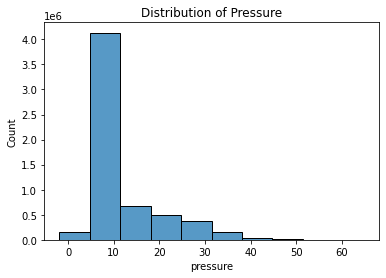

In [36]:
sns.histplot(data=df, x="pressure", bins = 10)
plt.title('Distribution of Pressure')

Text(0.5, 1.0, 'Distribution of Pressure 2')

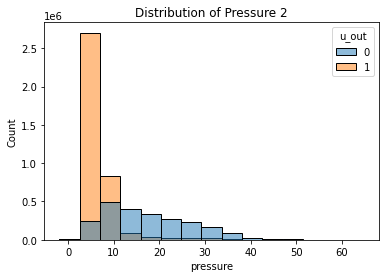

In [37]:
sns.histplot(data=df, x="pressure", bins = 15, hue = 'u_out')
plt.title('Distribution of Pressure 2')

<AxesSubplot:title={'center':'Pearson Correlation'}>

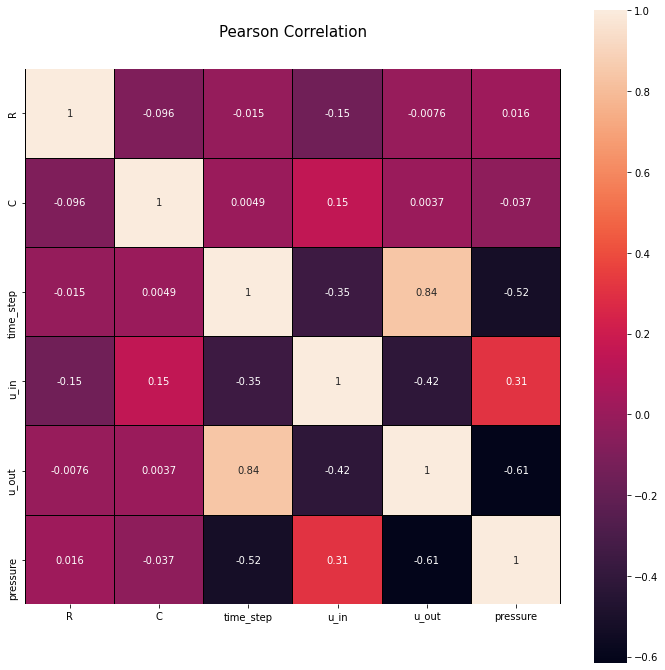

In [26]:
#None of the variables have a strong correlation with pressure (target value)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation', y=1.05, size=15)
labels = df.iloc[:,2:].columns.values
sns.heatmap(df.iloc[:,2:].corr().values,linewidths=0.1,vmax=1.0,square=True, linecolor='black',
            annot=True,xticklabels=labels,yticklabels=labels)

In [38]:
sample = df.loc[df.breath_id==5]

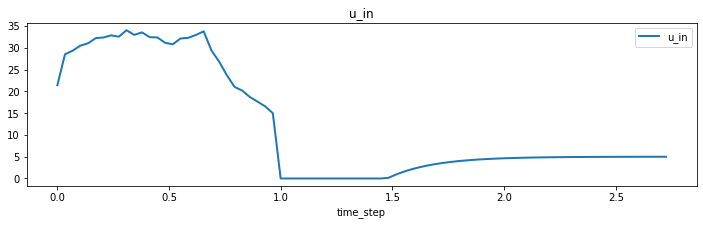

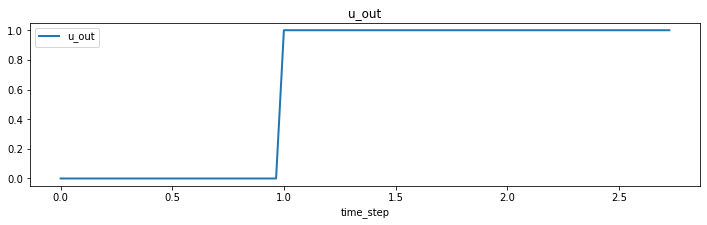

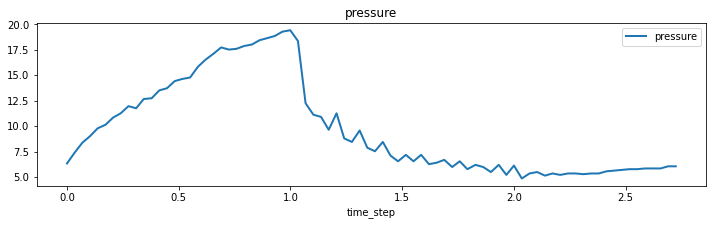

In [32]:
sample.plot(x="time_step", y="u_in", kind='line',figsize=(12,3), lw=2, title="u_in");
sample.plot(x="time_step", y="u_out", kind='line',figsize=(12,3), lw=2, title="u_out");
sample.plot(x="time_step", y="pressure", kind='line',figsize=(12,3), lw=2, title="pressure");

In [39]:
def feat_engine(data):
    #features used by kagglers
    #https://www.kaggle.com/tenffe/finetune-of-tensorflow-bidirectional-lstm
    df = data.copy()
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_out__max'] = df.groupby(['breath_id'])['u_out'].transform('max')
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    df['cross']= df['u_in']*df['u_out']
    df['cross2']= df['time_step']*df['u_out']
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    return df


In [40]:
train_data = feat_engine(df)

In [41]:
train_data.head()

,id,breath_id,time_step,u_in,u_out,pressure,area,u_in_cumsum,u_in_lag1,u_out_lag1,...,C_50,R__C_20__10,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50
0,1,1,0.000000,0.083334,0,5.837492,0.000000,0.083334,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
1,2,1,0.033652,18.383041,0,5.907794,0.618632,18.466375,0.083334,0.0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,0.067514,22.509278,0,7.876254,2.138333,40.975653,18.383041,0.0,...,1,0,0,1,0,0,0,0,0,0
3,4,1,0.101542,22.808822,0,11.742872,4.454391,63.784476,22.509278,0.0,...,1,0,0,1,0,0,0,0,0,0
4,5,1,0.135756,25.355850,0,12.234987,7.896588,89.140326,22.808822,0.0,...,1,0,0,1,0,0,0,0,0,0
